In [101]:
import pandas as pd

In [102]:
import numpy as np

In [103]:
import matplotlib.pyplot as plt

In [104]:
import seaborn as sns

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

In [106]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [108]:
df.duplicated('CustomerId').sum()

0

In [109]:
df = df.set_index('CustomerId')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [111]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [112]:
df.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain': 0}}, inplace=True)

In [113]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [114]:
df.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)

In [115]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [116]:
df.replace({'Num of Products': {1: 0, 2: 1, 3: 1, 4: 1}}, inplace=True)

In [117]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [118]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [119]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [120]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

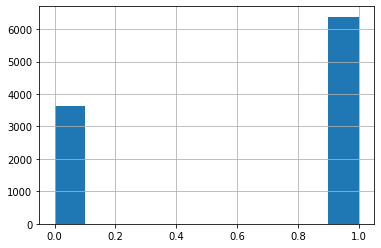

In [121]:
df['Zero Balance'].hist()

In [122]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [123]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [124]:
x = df.drop(['Surname', 'Churn'], axis = 1)

In [125]:
y = df['Churn']

In [126]:
x.shape, y.shape

((10000, 11), (10000,))

In [127]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

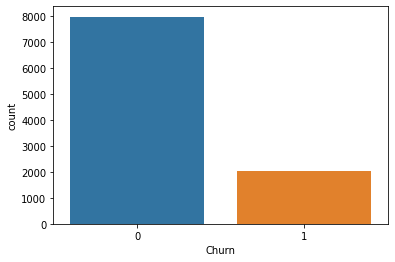

In [128]:
sns.countplot(x = 'Churn', data = df)

In [129]:
x.shape, y.shape

((10000, 11), (10000,))

In [130]:
from imblearn.under_sampling import RandomUnderSampler

In [131]:
rus = RandomUnderSampler(random_state = 252529)

In [132]:
x_rus, y_rus = rus.fit_resample(x,y)

In [133]:
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [134]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [135]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

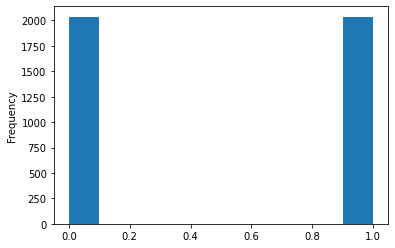

In [136]:
y_rus.plot(kind = 'hist')

In [137]:
from imblearn.over_sampling import RandomOverSampler

In [138]:
ros = RandomOverSampler(random_state = 252529)

In [139]:
x_ros, y_ros = ros.fit_resample(x,y)

In [140]:
x_ros.shape, y_ros.shape, x.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [141]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [142]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

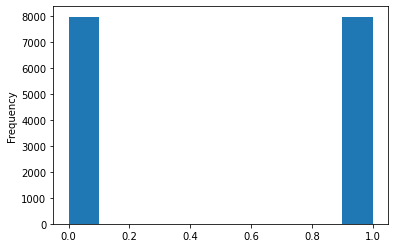

In [143]:
y_ros.plot(kind = 'hist')

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 252529)

In [146]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size = 0.3, random_state = 252529)

In [147]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 252529)

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
sc = StandardScaler()

In [150]:
x_train[['CreditScore', 'Age','Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [151]:
x_test[['CreditScore', 'Age','Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [152]:
x_train_rus[['CreditScore', 'Age','Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [153]:
x_test_rus[['CreditScore', 'Age','Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [154]:
x_train_ros[['CreditScore', 'Age','Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [155]:
x_test_ros[['CreditScore', 'Age','Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [156]:
from sklearn.svm import SVC

In [157]:
svc = SVC()

In [158]:
svc.fit(x_train, y_train)

SVC()

In [159]:
y_pred = svc.predict(x_test)

In [160]:
from sklearn.metrics import confusion_matrix, classification_report

In [161]:
confusion_matrix(y_test, y_pred)

array([[2353,   34],
       [ 391,  222]])

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2387
           1       0.87      0.36      0.51       613

    accuracy                           0.86      3000
   macro avg       0.86      0.67      0.71      3000
weighted avg       0.86      0.86      0.83      3000



In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
param_grid = {'C':[0.1,1,10], 'gamma':[1,0.1,0.01], 'kernel':['rbf'], 'class_weight':['balanced']}

In [165]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)


In [166]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [167]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [168]:
grid_predictions = grid.predict(x_test)

In [169]:
confusion_matrix(y_test,grid_predictions)

array([[2200,  187],
       [ 381,  232]])

In [170]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      2387
           1       0.55      0.38      0.45       613

    accuracy                           0.81      3000
   macro avg       0.70      0.65      0.67      3000
weighted avg       0.79      0.81      0.80      3000



In [171]:
svc_rus = SVC()

In [172]:
svc_rus.fit(x_train_rus, y_train_rus)

SVC()

In [173]:
y_pred_rus = svc_rus.predict(x_test_rus)

In [174]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[480, 136],
       [161, 446]])

In [175]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       616
           1       0.77      0.73      0.75       607

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



In [176]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [177]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv =2)

In [178]:
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [179]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [180]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [181]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[481, 135],
       [162, 445]])

In [182]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       616
           1       0.77      0.73      0.75       607

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



In [183]:
svc_ros = SVC()

In [184]:
svc_ros.fit(x_train_ros, y_train_ros)

SVC()

In [185]:
y_pred_ros = svc_ros.predict(x_test_ros)

In [186]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1886,  522],
       [ 570, 1800]])

In [187]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2408
           1       0.78      0.76      0.77      2370

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



In [188]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight': ['balanced']}

In [189]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)

In [190]:
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [191]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [192]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [193]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2102,  306],
       [  74, 2296]])

In [194]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2408
           1       0.88      0.97      0.92      2370

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2387
           1       0.87      0.36      0.51       613

    accuracy                           0.86      3000
   macro avg       0.86      0.67      0.71      3000
weighted avg       0.86      0.86      0.83      3000



In [196]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      2387
           1       0.55      0.38      0.45       613

    accuracy                           0.81      3000
   macro avg       0.70      0.65      0.67      3000
weighted avg       0.79      0.81      0.80      3000



In [197]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       616
           1       0.77      0.73      0.75       607

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



In [198]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       616
           1       0.77      0.73      0.75       607

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



In [199]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2408
           1       0.78      0.76      0.77      2370

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



In [200]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2408
           1       0.88      0.97      0.92      2370

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778

